Install Pytorch and fastbook

In [2]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

Import fastbook, colab, image display library

In [4]:
from fastbook import *
from google.colab import files
from IPython.display import Image
from IPython.display import HTML

Get images from github

In [42]:
!npx degit github:GemmyTheGeek/BirdNerd BirdNerd --force
path = Path('BirdNerd/images')

npx: installed 1 in 1.033s
> destination directory is not empty. Using --force, continuing
> cloned GemmyTheGeek/BirdNerd#HEAD to BirdNerd


In [43]:
path

Path('BirdNerd/images')

In [34]:
ls

BirdNerd/  sample_data/


In [35]:
path.ls()

(#3) [Path('BirdNerd/images/train'),Path('BirdNerd/images/valid'),Path('BirdNerd/images/test')]

In [36]:
(path/"test").ls()

(#3) [Path('BirdNerd/images/test/01'),Path('BirdNerd/images/test/00'),Path('BirdNerd/images/test/02')]

In [38]:
(path/"test/00").ls()

(#30) [Path('BirdNerd/images/test/00/0034.jpg'),Path('BirdNerd/images/test/00/0040.jpg'),Path('BirdNerd/images/test/00/0058.jpg'),Path('BirdNerd/images/test/00/0036.jpg'),Path('BirdNerd/images/test/00/0051.jpg'),Path('BirdNerd/images/test/00/0046.jpg'),Path('BirdNerd/images/test/00/0054.jpg'),Path('BirdNerd/images/test/00/0052.jpg'),Path('BirdNerd/images/test/00/0031.jpg'),Path('BirdNerd/images/test/00/0042.jpg')...]

Creat Datablock

In [53]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    #two choices for resizing and rationale
    #squishing to prevent cropping places without chips/raisins
    item_tfms=Resize(224, method=ResizeMethod.Squish), 
    # #cropping to preserve image quality; tried and doesn't work - peaked at 0.85 val acc
    # item_tfms=RandomResizedCrop(512),
    #batch_tfms=aug_transforms(size=512)
    )
dls = dblock.dataloaders(path, bs=32) #batch size = 64

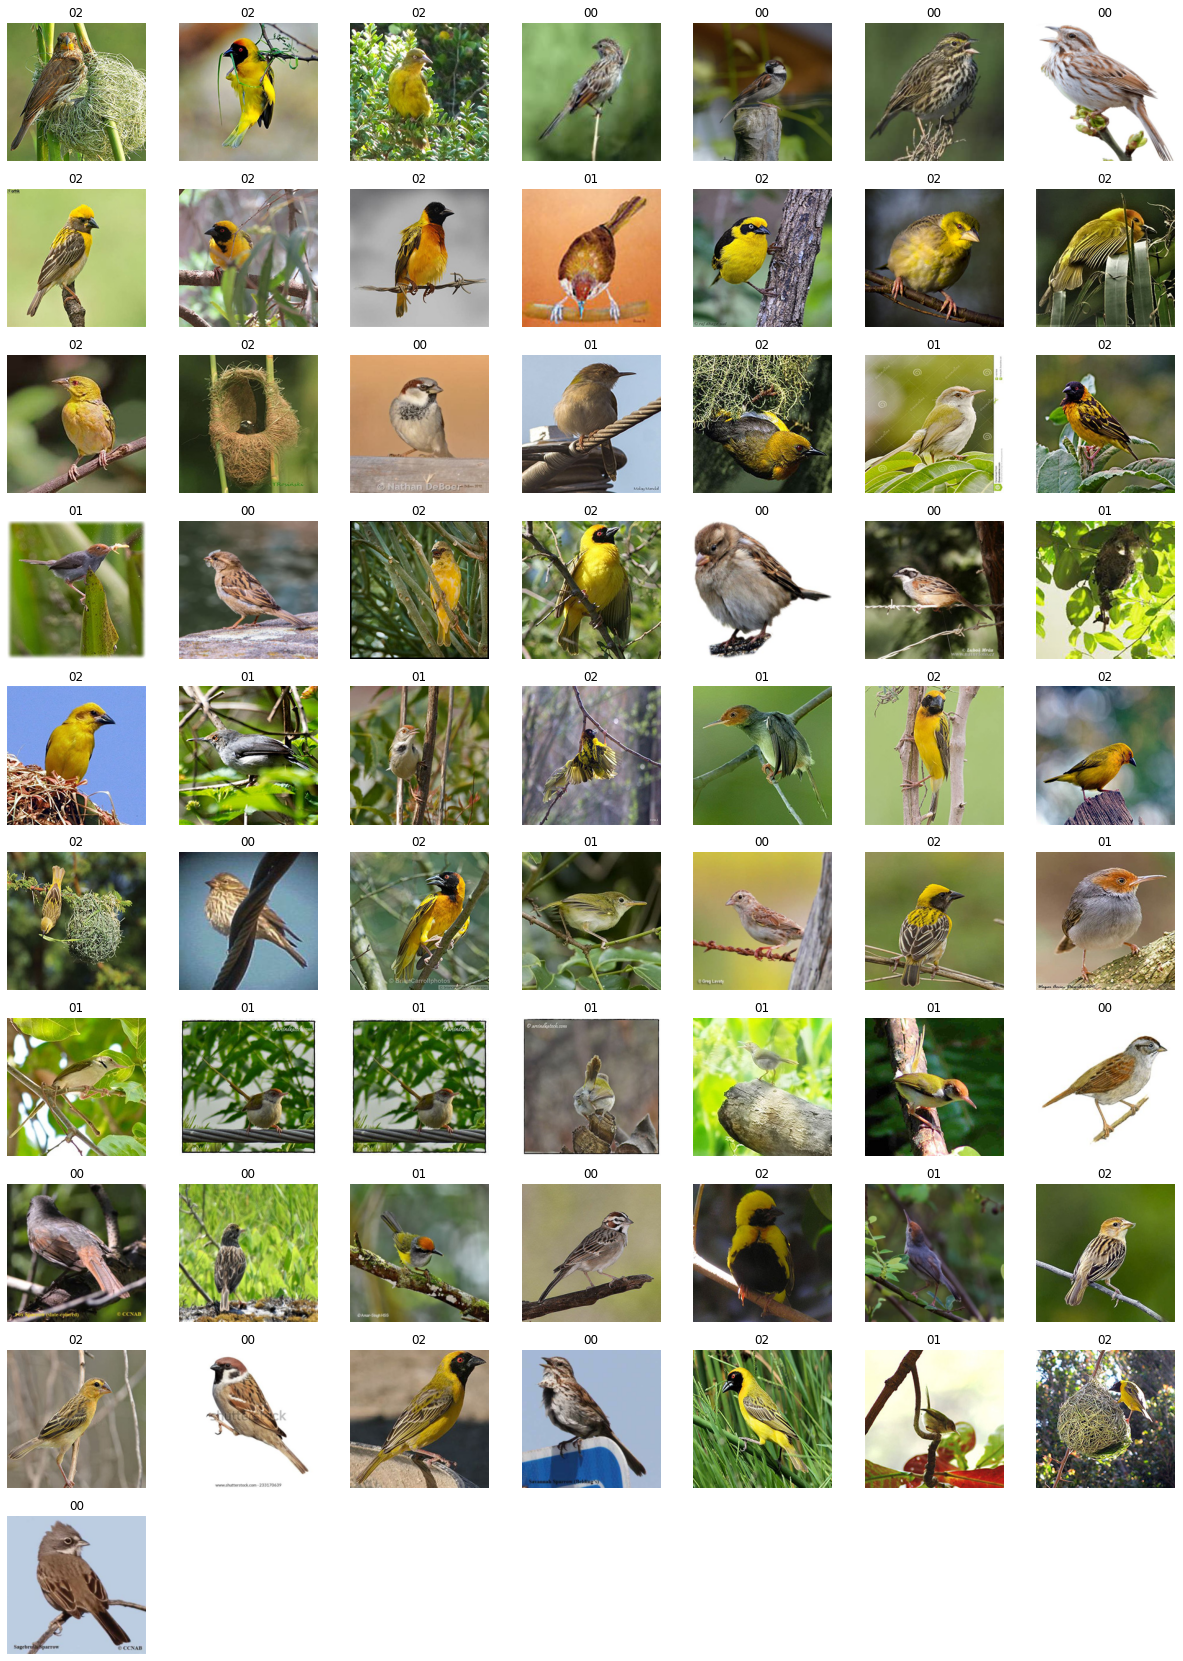

In [50]:
dls.train.show_batch(max_n=70,nrows=10)

Training

In [54]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(9)

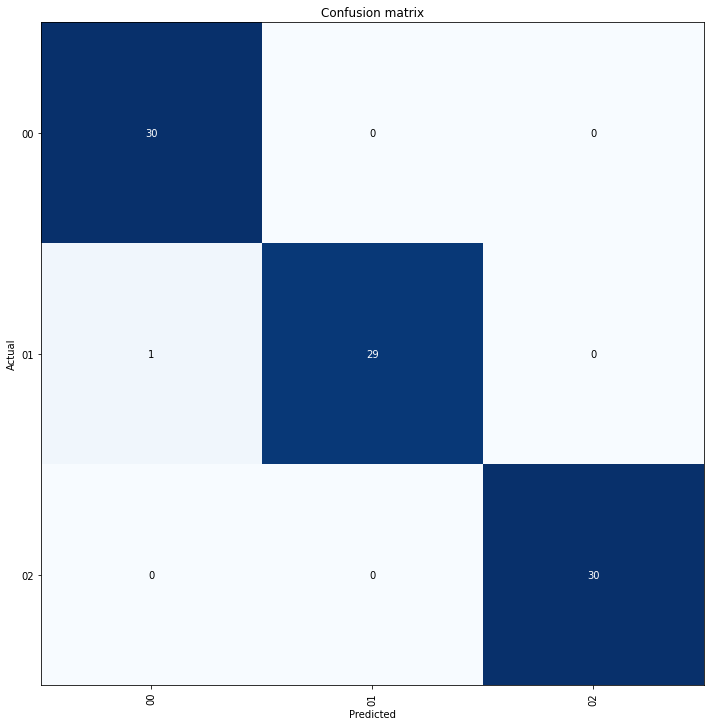

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

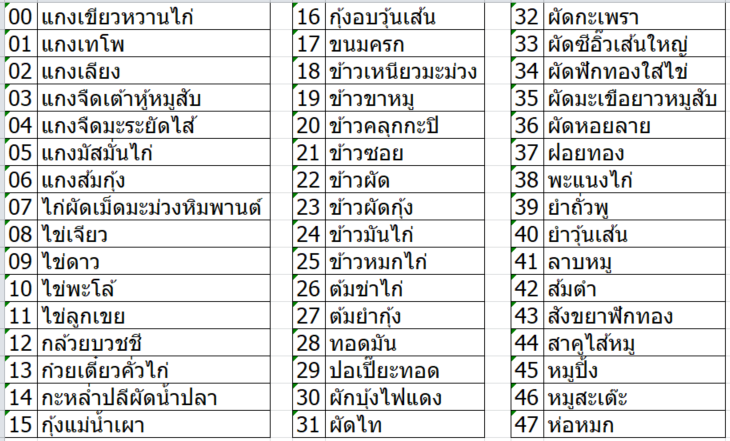

In [ ]:
Image('47thaifood.png')

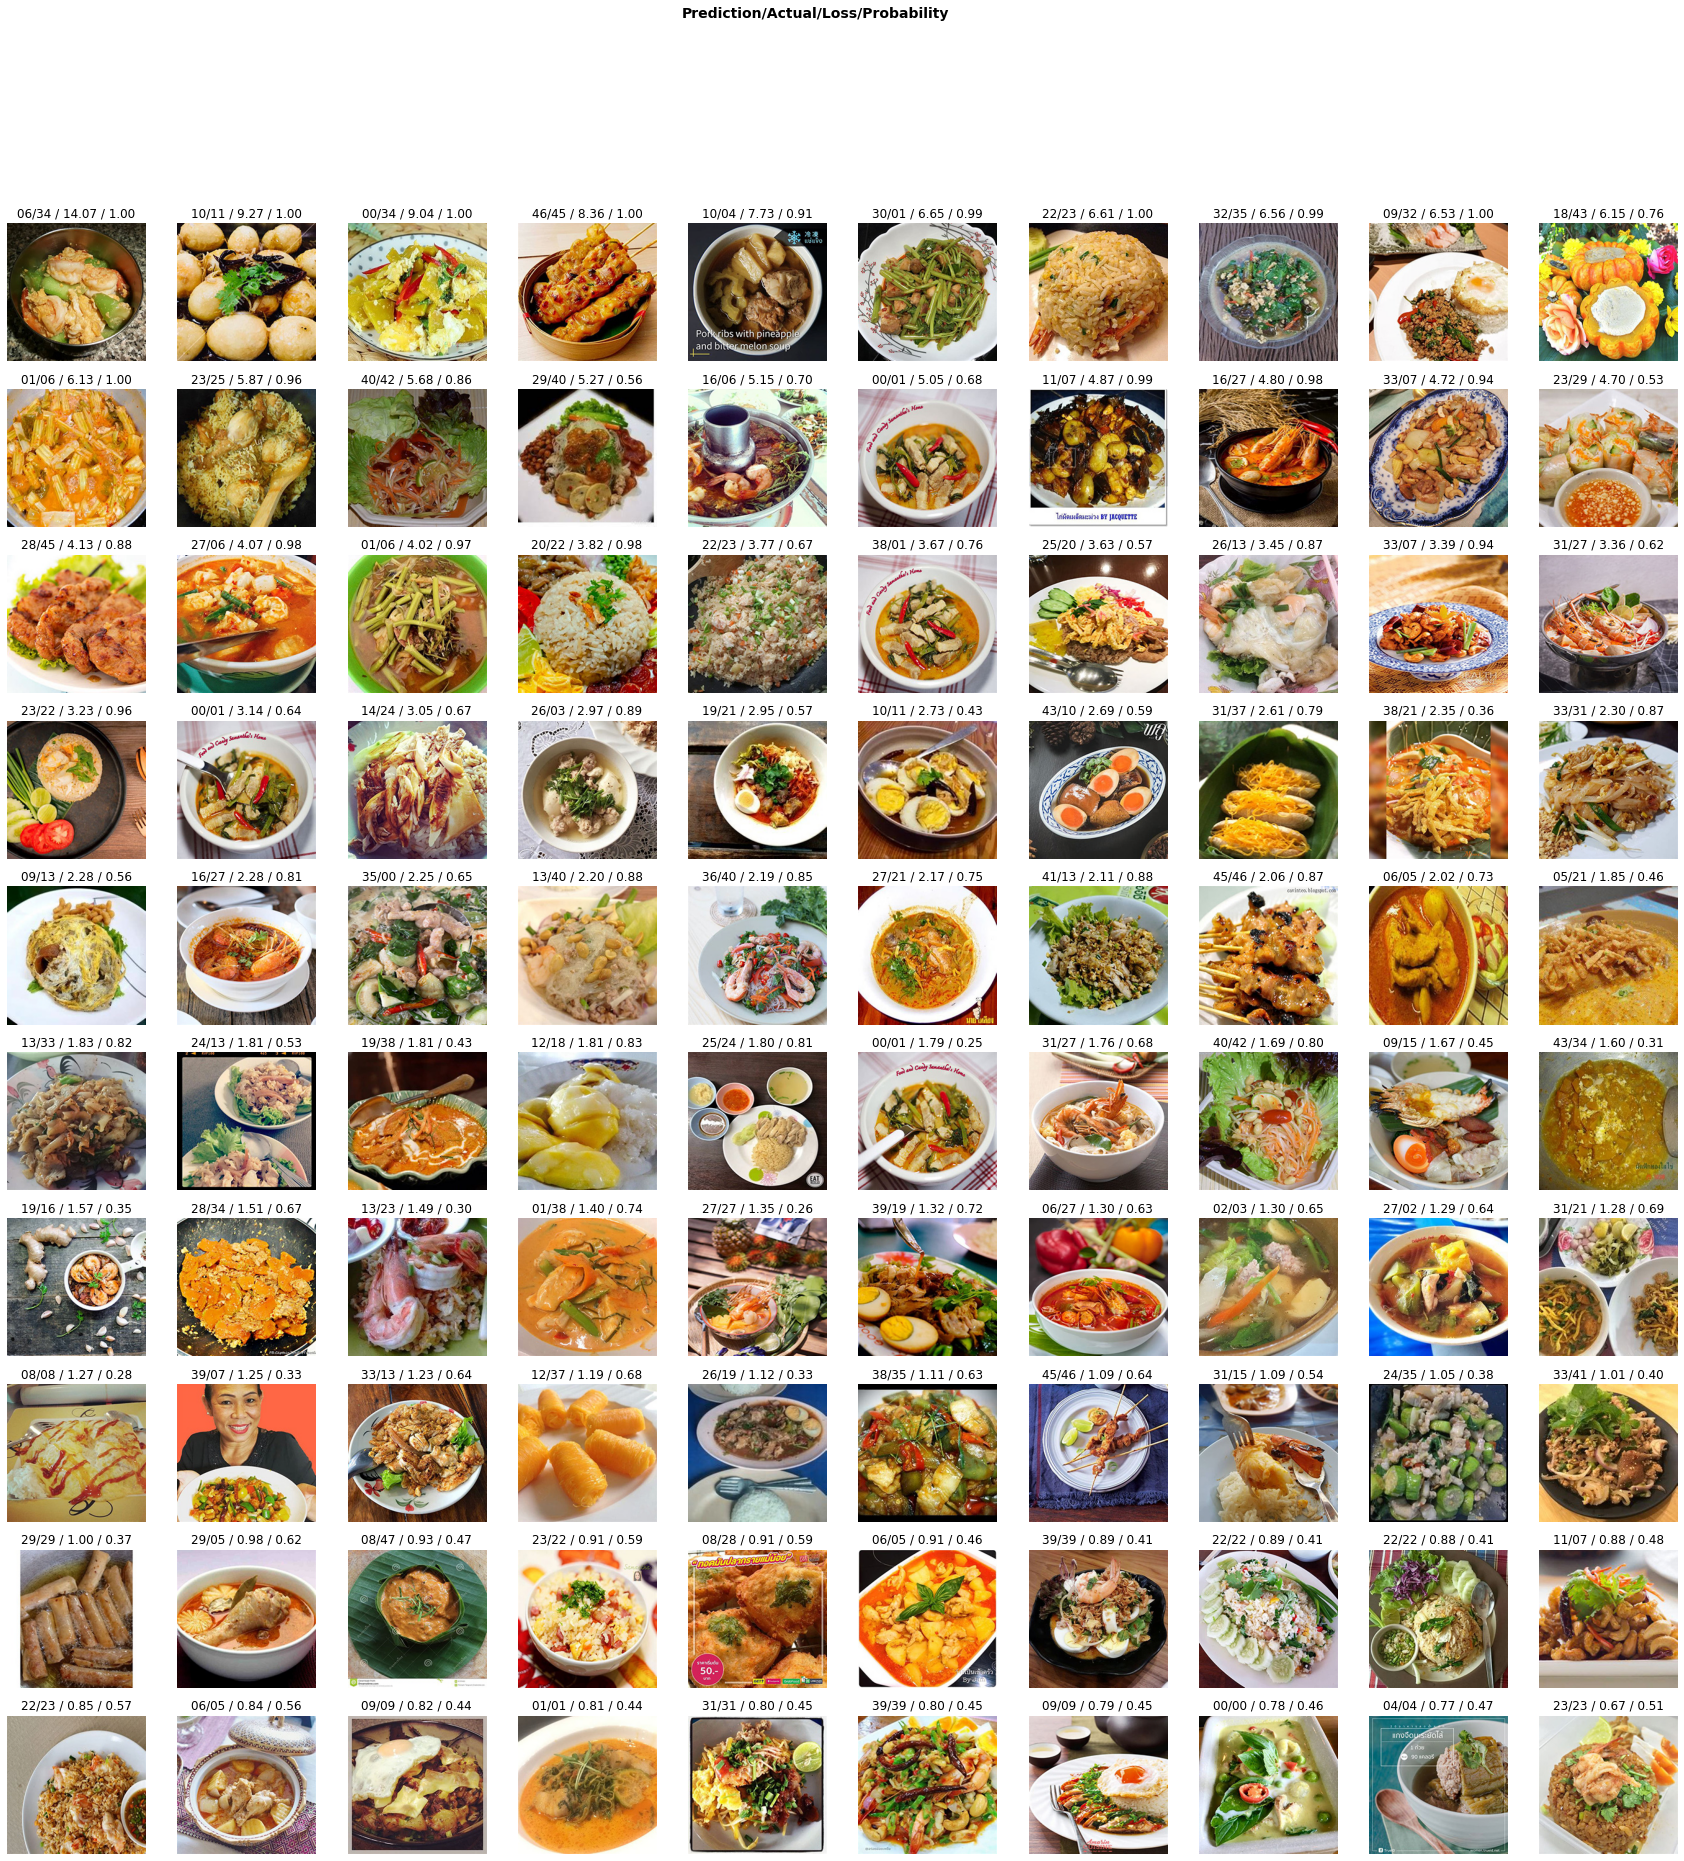

In [ ]:
interp.plot_top_losses(100, nrows=10)

In [56]:
learn.save('model')

Path('models/model.pth')

In [57]:
exportfilename='BirdNerdV1.pkl'
learn.export(exportfilename)
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('BirdNerdV1.pkl')]

In [ ]:
ls

drive/  export.pkl  FoodyDudy/  sample_data/


In [ ]:
path = Path('FoodyDudy/images')
dblock2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(valid_name='test'), #use parent folder as train-test split
    get_y=parent_label, #use parent folder as label
    )
dls2 = dblock2.dataloaders(path, bs=64) #batch size = 64

learn = cnn_learner(dls2, resnet34, metrics=error_rate).to_fp16()
#load trained model
learn.load('model');

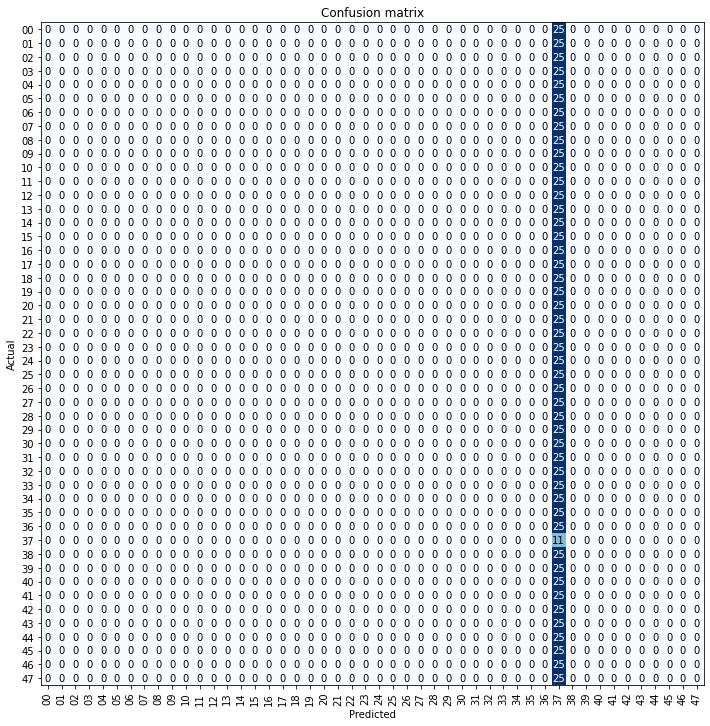

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report() 

              precision    recall  f1-score   support

          00       0.77      0.80      0.78        25
          01       0.88      0.60      0.71        25
          02       0.61      0.56      0.58        25
          03       0.51      0.72      0.60        25
          04       0.58      0.56      0.57        25
          05       0.80      0.32      0.46        25
          06       0.41      0.36      0.38        25
          07       0.84      0.64      0.73        25
          08       0.50      0.68      0.58        25
          09       0.71      0.96      0.81        25
          10       0.88      0.56      0.68        25
          11       0.82      0.72      0.77        25
          12       0.81      0.84      0.82        25
          13       0.53      0.32      0.40        25
          14       0.94      0.60      0.73        25
          15       0.83      0.76      0.79        25
          16       0.55      0.72      0.62        25
          17       0.59    

In [ ]:
ls

In [58]:
files.download(exportfilename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
youtubeid='QWa3indn_84'
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/' + youtubeid + '" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')